<a href="https://colab.research.google.com/github/blue-slushy9/py-tensorflow-tutorials/blob/main/keras2_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.15.0


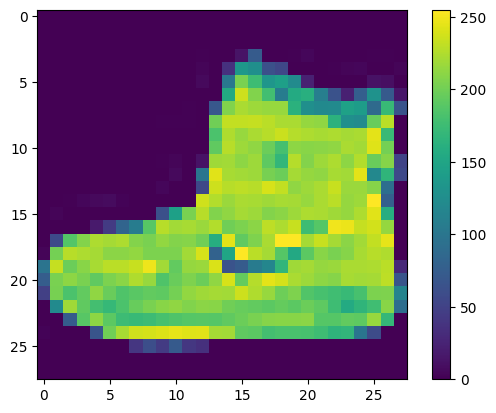

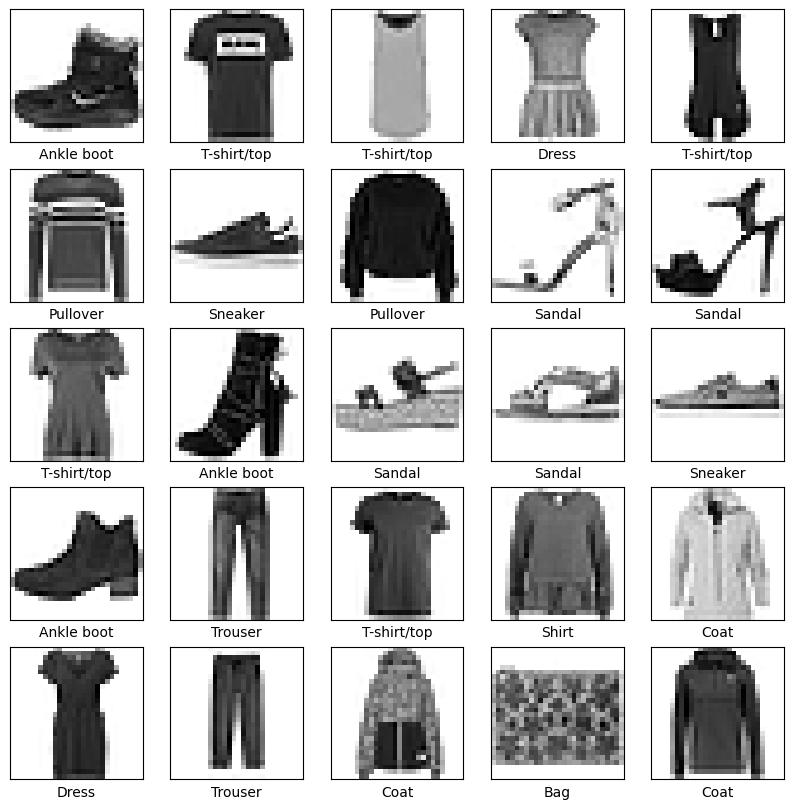

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4987 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3777 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3391 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3167 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2975 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2712 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2600 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

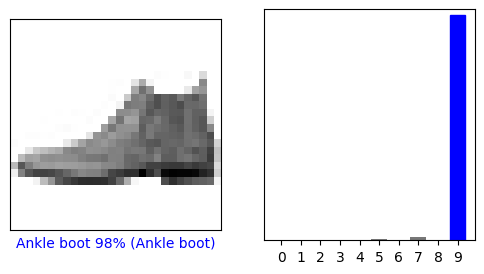

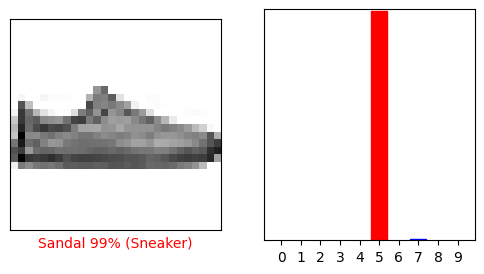

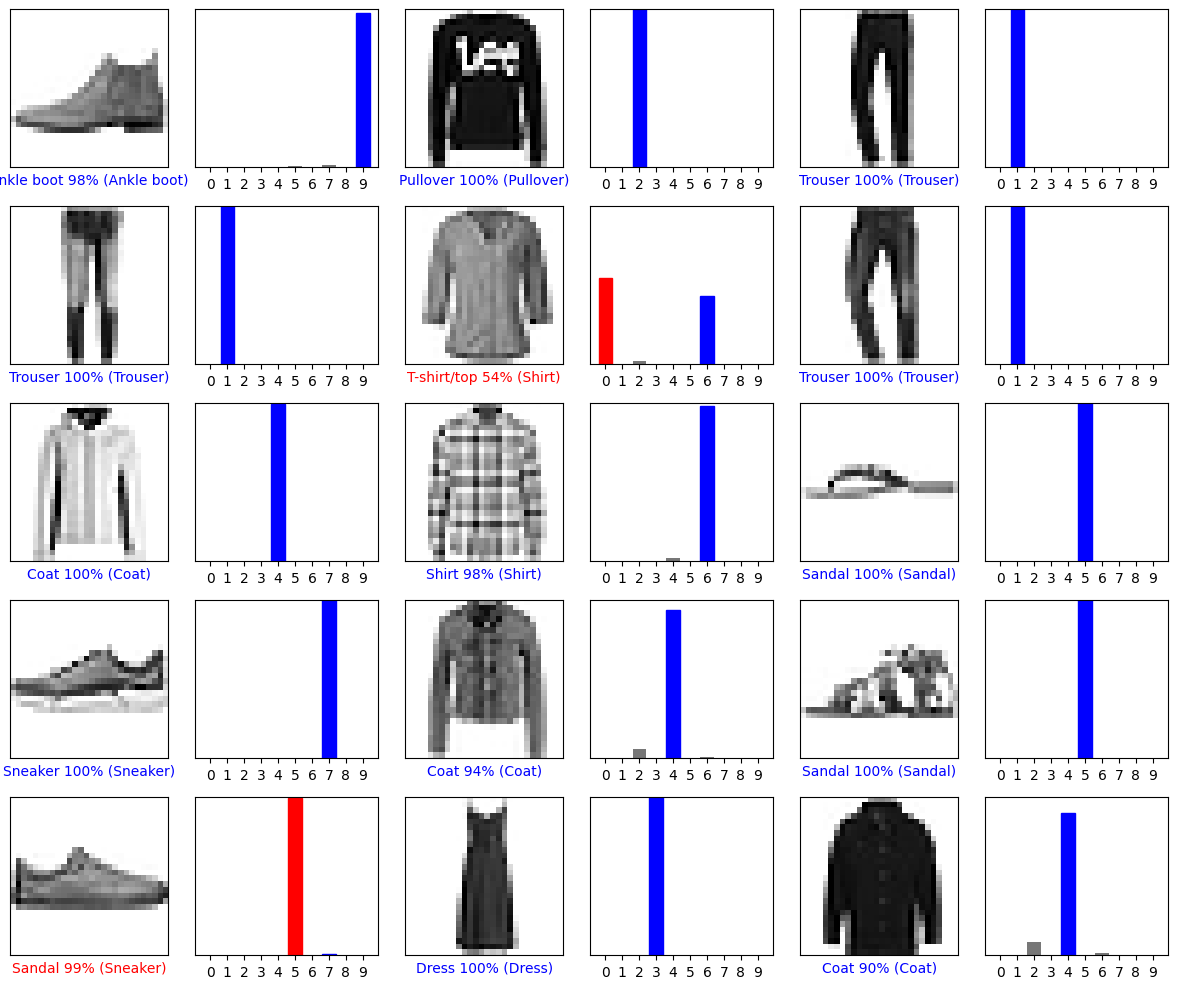

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[6.5963595e-06 8.9769939e-16 9.9956292e-01 1.2924735e-10 1.9618066e-04
  4.1161397e-13 2.3426251e-04 8.8534905e-20 6.6217331e-12 6.0688136e-15]]


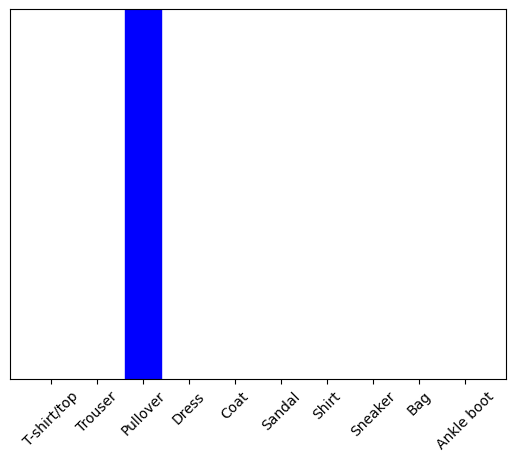

2

In [13]:
# This model trains a neural network model to classify images of clothing

import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Import fashion dataset from MNIST from TF, assign to variable
fashion_mnist = tf.keras.datasets.fashion_mnist

# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255;
# the labels are an array of integers, from 0 to 9, with each number
# corresponding to the class of clothing the image represents;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Each image is mapped to a single label, since the class names are not
# included with the dataset, store them here to use later when plotting the
# images;
# '\' is a line break, needed to break up list into two lines for readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the format of the dataset before training the model, this command
# shows there are 60,000 images
train_images.shape

# This command shows there are 60,000 labels in the training set
len(train_labels)

# As stated above, each label is an integer between 0 and 9
train_labels

# There are 10,000 images in the test set, each image is 28x28 pixels
test_images.shape

# The test set contains 10,000 image labels
len(test_labels)

# Preprocess the data, this must be done before training the network
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Scale values to a range of 0 to 1 before feeding them to the NN model---
# to do this, divide the values by 255; it's important that the training set
# and the testing set be preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

# To verify that the data is in the correct format and that you're ready to
# build and train the NN, display the first 25 images from the training set
# and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# BUILD THE MODEL

# Set up the layers: basic building block of a NN is the layer; layers extract
# representations from the data fed into them; most of deep learning consists
# of chaining together simple layers; most layers (e.g. tf.keras.layers.Dense)
# have parameters that are learned during training
model = tf.keras.Sequential([
  # Flatten transforms the format of the images from a two-dimensional array
	# (28x28 pixels) to a one-dimensional array (28*28 = 784 pixels), you can
	# think of this layer as unstacking rows of pixels in the image and lining
	# them up; this layer has no parameters to learn, it only reformats data
  tf.keras.layers.Flatten(input_shape=(28, 28)),
	# Dense layers are densely connectioned, or fully connected, neural layers;
	# this first Dense layer has 128 nodes (i.e. neurons); these Dense layers
	# return a logits array with a length of 10; each node contains a score
	# that indicates the current image belongs to one of the 10 classes
	tf.keras.layers.Dense(128, activation='relu'),
	# This Dense layer has 10 nodes
	tf.keras.layers.Dense(10)
])

# COMPILE THE MODEL

# Before the model is ready for training, it needs a few more settings---
# these are added during the model's compile step; OPTIMIZER: this is how the
# model is updated based on the data it sees and its loss function;
# LOSS FUNCTION: measures how accurate the model is during training, you want
# to minimize this function to "steer" the model in the right direction;
# METRIC: used to monitor the training and testing steps, the below example
# uses ACCURACY, the fraction of the images that are correctly classified
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# TRAIN THE MODEL

# Training the NNM requires the following steps:
# 1) Feed the training data to the model, e.g. train_images and train_labels
# 2) The model learns to associate images and labels
# 3) Ask the model to make predictions about a test set, e.g. the test_images
#    array
# 4) Verify that the predictions match the labels from the test_labels array

# FEED THE MODEL

# To start training, call the model.fit method (it is called this because it
# "fits" the model to the training data
model.fit(train_images, train_labels, epochs=10)

# EVALUATE ACCURACY

# Compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# RESULTS: if you run the program, you will see that the accuracy on the test
# dataset is a little less than the accuracy on the training dataset; this gap
# between training and test accuracy represents OVERFITTING; this happens when
# a ML model performs on new, previously unseen inputs than it does on the
# training data; an OVERFITTED MODEL "memorizes" the noise and details in the
# training dataset to a point where it negatively impacts the performance of
# the model on the new data

# MAKE PREDICTIONS

# Now that the model is trained, you can start using it to make predictions
# about some images; attach a softmax layer to convert the model's LINEAR
# OUTPUTS (i.e. LOGITS) to probabilities, which are often easier to interpret
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

# Call the predict() method
predictions = probability_model.predict(test_images)

# View the first prediction the model has made; when you run the program, you
# will see that a prediction is an array of 10 numbers, which represent the
# model's "confidence" that the image corresponds to each of the 10 different
# articles of clothing (i.e. classes)
predictions[0]

# View which label has the highest confidence value
np.argmax(predictions[0])

# You can cross-reference the test_labels to verify the prediction
test_labels[0]

# Define functions to graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
	  100*np.max(predictions_array),
	  class_names[true_label]),
	  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# VERIFY PREDICTIONS

# Verify 0th image, predictions, and prediction array; correct prediction
# labels are blue and incorrect prediction labels are red; the number gives
# the percentage (out of 100) for the predicted label
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# Verify 12th image...
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels;
# Color correct predictions in blue and incorrect predictions in red;
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# USE THE TRAINED MODEL

# Finally, use the trained model to make a prediction about a single image

# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

# tf.keras models are optimized to make predictions on a batch, or collection,
# of examples at once; accordingly, even though you are using only a single
# image, you need to add it to a list;

# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# tf.keras.Model.predict returns a list of lists---one for each image in the
# batch of data; grab the predictions for our only image in the batch
np.argmax(predictions_single[0])